# Import Libraries

In [ ]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
from read_data import combine_all, combine_category, read_data

In [ ]:
import gensim
import re
from time import time
from collections import defaultdict
import spacy
import multiprocessing

from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn.metrics import silhouette_samples, silhouette_score

# Working on Entire Dataset

## Reading Dataset

In [ ]:
data = combine_all() # this function is written by us for reading all the dataset for different videos

In [ ]:
data.head(5)

,Name,Comment,Time,Likes,Reply Count\r,Reply Count
0,MrBeast,"Like I said in the video, subscribe if you hav...",2021-11-24T21:02:45Z,860124,411.0,NaN
1,Natanael De La Torre,IRL:squid game already IRL,2022-04-03T01:26:06Z,0,0.0,NaN
2,Rexx2Byte,4:39 EYYYYYYY WASSUP NIGHT FOX,2022-04-03T01:19:41Z,1,0.0,NaN
3,HK KING868,After reject Netflix,2022-04-03T01:06:44Z,0,0.0,NaN
4,Dragon Walker,some people just made the marbles game so conf...,2022-04-03T01:06:41Z,1,0.0,NaN


In [ ]:
df = data[['Name', 'Comment']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351212 entries, 0 to 70956
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Name     1351105 non-null  object
 1   Comment  1350925 non-null  object
dtypes: object(2)
memory usage: 30.9+ MB


## Data Cleaning

In [ ]:
data = combine_all()

In [ ]:
data = data[['Name', 'Comment']]

In [ ]:
data = data.dropna() # deleting all nan values

In [ ]:
data.isnull().sum()

Name       0
Comment    0
dtype: int64

In [ ]:
comments = data.Comment.apply(gensim.utils.simple_preprocess) # gensum preprocessing

## Word2Vec

In [ ]:
w2v_model = Word2Vec(min_count=0,
                     window=10,
                     workers=multiprocessing.cpu_count()-1) # initializing word2vec model

In [ ]:
w2v_model.build_vocab(comments, progress_per=10000) # building vocab

In [ ]:
w2v_model.train(comments, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1) # word2vec train

(206606275, 256329330)

## K-Means - Silhouette Score

In [ ]:
model = KMeans(n_clusters=3, max_iter=1000, random_state=True, n_init=50).fit(X=w2v_model.wv.vectors) # kmeans on word2vec feature vectors
score = silhouette_score(w2v_model.wv.vectors, model.labels_, metric='euclidean') #  silhouette_score
score

0.70732135

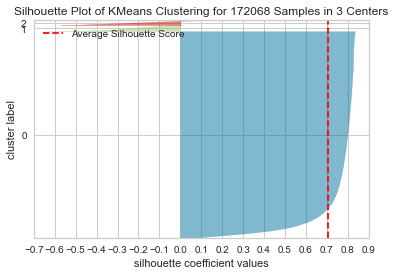

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 172068 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=True, n_init=50)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(w2v_model.wv.vectors)
visualizer.show()

#### In the above graph we have not received adequate results for clustering, this might be because majority of comments are positve giving us an imbalanced dataset. Also since videos have global reach we have comments from many languages. This makes it hard for our model to cluster comemnts into proper labels. We plan to work on this drawback by getting more data from wide variety of videos and using BERT algorithm which can handle multiple languages.